In [1]:
import os
import numpy as np
from keras.applications.efficientnet import EfficientNetB7, preprocess_input
from keras.preprocessing import image
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive



In [2]:
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'


Mounted at /content/drive


In [3]:
# Image dimensions
img_width, img_height = 224, 224  # EfficientNetB0 input size
batch_size = 32
num_epochs = 20

# Load model for feature extraction
model = EfficientNetB7(weights='imagenet', include_top=False)

258076736/258076736 [==============================] - 2s 0us/step


In [4]:
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)  # Preprocess input according to the model requirements
    features = model.predict(img_data)
    return features

In [5]:
 #Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)


1/1 [==============================] - 0s 477ms/step


In [6]:
# Evaluate on test set
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 1s 837ms/step


Training Bernoulli Naive Bayes...
Performance metrics for Bernoulli Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.20      1.00      0.34        60
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        60
           4       0.25      0.02      0.03        60

    accuracy                           0.20       300
   macro avg       0.09      0.20      0.07       300
weighted avg       0.09      0.20      0.07       300

Accuracy: 0.20333333333333334
Sensitivity: 0.2033333333333333
Precision: 0.09054054054054055
F1 Score: 0.07366573033707866



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

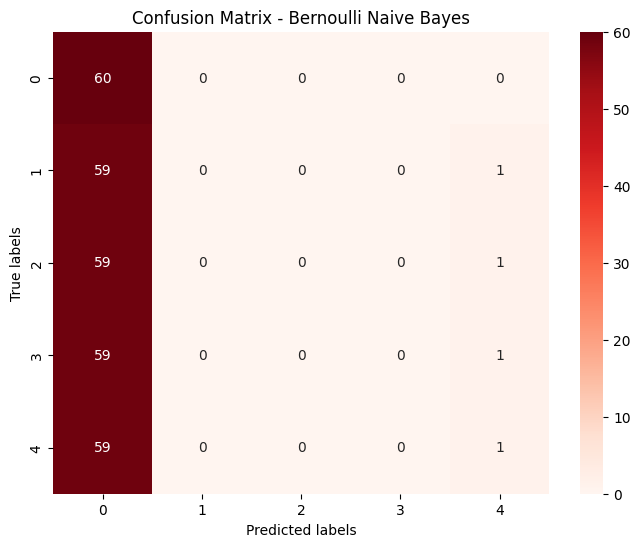

Training Multinomial Naive Bayes...
Performance metrics for Multinomial Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        60
           1       0.47      0.70      0.56        60
           2       0.33      0.23      0.27        60
           3       0.54      0.70      0.61        60
           4       0.66      0.42      0.51        60

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.50       300
weighted avg       0.52      0.52      0.50       300

Accuracy: 0.5166666666666667
Sensitivity: 0.5166666666666667
Precision: 0.5223481781376519
F1 Score: 0.5049676218313413



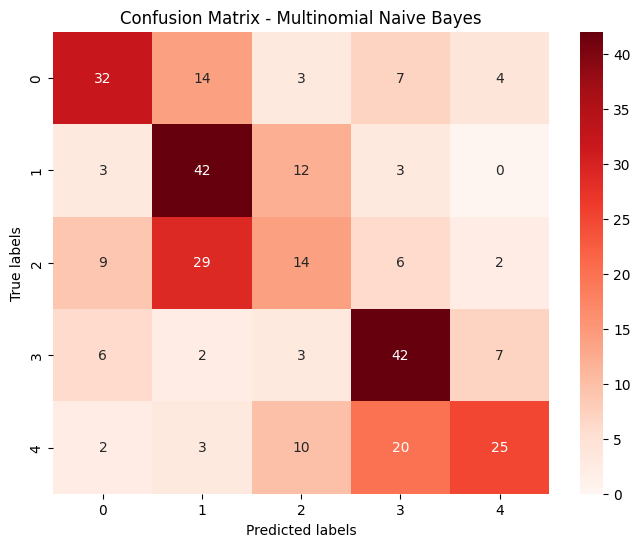

Training Complement Naive Bayes...
Performance metrics for Complement Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.40      0.49        60
           1       0.42      0.88      0.57        60
           2       0.20      0.02      0.03        60
           3       0.48      0.83      0.61        60
           4       0.73      0.32      0.44        60

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.43       300
weighted avg       0.49      0.49      0.43       300

Accuracy: 0.49
Sensitivity: 0.49000000000000005
Precision: 0.494586238050805
F1 Score: 0.4280761165113908



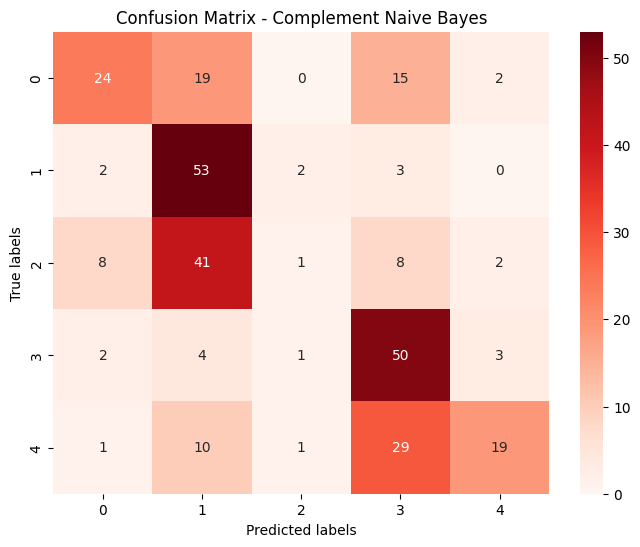

Training Gaussian Naive Bayes...
Performance metrics for Gaussian Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58        60
           1       0.45      0.68      0.54        60
           2       0.38      0.20      0.26        60
           3       0.56      0.73      0.63        60
           4       0.75      0.45      0.56        60

    accuracy                           0.53       300
   macro avg       0.54      0.53      0.51       300
weighted avg       0.54      0.53      0.51       300

Accuracy: 0.53
Sensitivity: 0.53
Precision: 0.5402769382065555
F1 Score: 0.5148898342603977



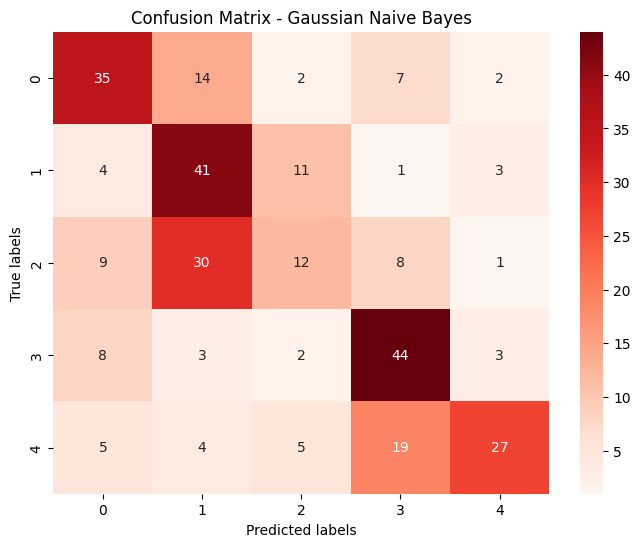

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the features for B2
x_train_flat_b2 = np.array([feature.flatten() for feature in x_train])
x_test_flat_b2 = np.array([feature.flatten() for feature in x_test])

# Scale the input features to the range [0, 1] for B2
scaler_b2 = MinMaxScaler()
x_train_scaled_b2 = scaler_b2.fit_transform(x_train_flat_b2)
x_test_scaled_b2 = scaler_b2.transform(x_test_flat_b2)

# Ensure non-negative values for B2
min_value_b2 = np.min(np.concatenate([x_train_scaled_b2, x_test_scaled_b2]))
x_train_scaled_non_negative_b2 = x_train_scaled_b2 - min_value_b2
x_test_scaled_non_negative_b2 = x_test_scaled_b2 - min_value_b2

# List of classifiers to try
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

for clf_name, clf in classifiers.items():
    print(f"Training {clf_name} for Effb7...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative_b2, y_train)
    # Predict on test set
    y_pred_b2 = clf.predict(x_test_scaled_non_negative_b2)
    # Print performance metrics
    print(f'Performance metrics for {clf_name} with Effb7:')
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred_b2))  # Corrected variable names

    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred_b2)  # Corrected variable names
    sensitivity = metrics.recall_score(y_test, y_pred_b2, average='macro')  # Corrected variable names
    precision = metrics.precision_score(y_test, y_pred_b2, average='macro')  # Corrected variable names
    f1 = metrics.f1_score(y_test, y_pred_b2, average='macro')  # Corrected variable names
    specificity = metrics.recall_score(y_test, y_pred_b2, average='macro', pos_label=0)  # Specificity
    recall = metrics.recall_score(y_test, y_pred_b2, average='macro')  # Recall

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}')
    print(f'Specificity: {specificity}')
    print(f'Recall: {recall}\n')

    # Confusion matrix
    cm_b2 = confusion_matrix(y_test, y_pred_b2)  # Corrected variable names

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_b2, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with Effb7')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
